In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [2]:
zori_census_covid_biann = pd.read_csv('./zori_census_covid_biann')
zori_census_covid_biann = zori_census_covid_biann.iloc[:,1:]
zori_census_covid_biann_14_20 = zori_census_covid_biann[zori_census_covid_biann['year']<2021].reset_index(drop=True)
zori_census_covid_biann_14_20

,RegionName,year,rent_price,rent_next_biann,housing_units,occupied_housing_units,vacant_housing_units,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,...,amerindian_pop,other_race_pop,two_or_more_races_pop,hispanic_any_race,not_hispanic_pop,income_per_capita,zip_cases_to_ttl,zip_new_cases_to_ttl,zip_deaths_to_ttl,zip_new_deaths_to_ttl
0,1604,2014.0,1054.833333,1087.125000,15417.0,14057.0,1360.0,4737.0,1269.0,1780.0,...,102.0,46.0,611.0,5206.0,29422.0,25798.00,0.000000,0.000000,0.000000,0.000000
1,1604,2014.5,1087.125000,1119.416667,15427.5,14093.5,1334.0,4721.5,1288.0,1834.0,...,107.5,28.0,614.5,5742.5,29292.0,25623.00,0.000000,0.000000,0.000000,0.000000
2,1604,2015.0,1119.416667,1152.208333,15438.0,14130.0,1308.0,4706.0,1307.0,1888.0,...,113.0,10.0,618.0,6279.0,29162.0,25448.00,0.000000,0.000000,0.000000,0.000000
3,1604,2015.5,1152.208333,1185.000000,15547.5,14159.5,1388.0,4700.5,1267.5,1853.0,...,132.5,10.0,635.0,6379.0,29274.5,25855.50,0.000000,0.000000,0.000000,0.000000
4,1604,2016.0,1185.000000,1216.250000,15657.0,14189.0,1468.0,4695.0,1228.0,1818.0,...,152.0,10.0,652.0,6479.0,29387.0,26263.00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24355,99207,2018.5,1221.416667,1268.333333,13454.5,12117.0,1337.5,9804.0,292.5,1074.0,...,756.5,392.5,2163.5,2259.5,27800.0,19749.47,0.000000,0.000000,0.000000,0.000000
24356,99207,2019.0,1268.333333,1301.895833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
24357,99207,2019.5,1301.895833,1335.458333,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000000,0.000000,0.000000,0.000000
24358,99207,2020.0,1335.458333,1370.395833,13434.0,12204.0,1230.0,9786.0,326.0,964.0,...,763.0,767.0,2470.0,2297.0,28114.0,20136.94,0.000817,0.000455,0.000027,0.000005


### Base Model

In [3]:
x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']<2020.5].drop(
    'rent_next_biann',axis=1).iloc[:,2:]
y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']<2020.5]['rent_next_biann']
x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']==2020.5].drop(
    'rent_next_biann',axis=1).iloc[:,2:]
y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']==2020.5]['rent_next_biann']

In [4]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [5]:
# Regular Scores
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.9986942101497698
Train Score (Adj R Sq): 0.9986547579682759
0.7436652815349002
Test Score (Adj R Sq): 0.7359205714390944


<Figure size 1600x2400 with 0 Axes>

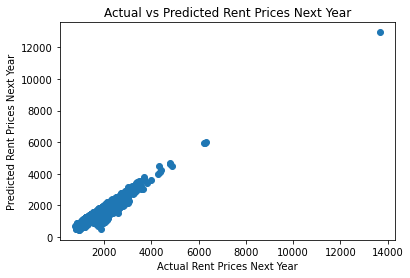

<Figure size 1600x2400 with 0 Axes>

In [6]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next Year')
plt.xlabel('Actual Rent Prices Next Year')
plt.ylabel('Predicted Rent Prices Next Year')
plt.figure(figsize=(20, 30), dpi=80)

In [7]:
scaler = StandardScaler()
pca = PCA()
mlmodel = LinearRegression()

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlmodel', mlmodel)])


param_grid = {
    'pca__n_components': range(1,zori_census_covid_biann_14_20.shape[1]-2,3)
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
search.best_params_

{'pca__n_components': 46}

In [8]:
pca = PCA(n_components = search.best_params_['pca__n_components'])
pca.fit(x_test)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [9]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [10]:
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.998655468537869
Train Score (Adj R Sq): 0.9986189366729794
0.8442335590343589
Test Score (Adj R Sq): 0.8400012753459836


<Figure size 1600x2400 with 0 Axes>

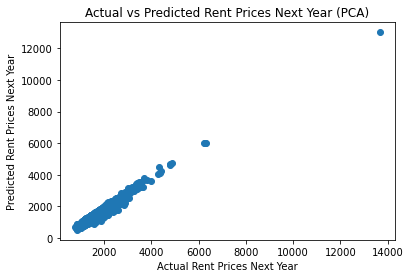

<Figure size 1600x2400 with 0 Axes>

In [11]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next Year (PCA)')
plt.xlabel('Actual Rent Prices Next Year')
plt.ylabel('Predicted Rent Prices Next Year')
plt.figure(figsize=(20, 30), dpi=80)

### Model Using Only 2019 - 2020

In [12]:
x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']<2020.5].drop('rent_next_biann',axis=1).iloc[:,2:]
y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']<2020.5]['rent_next_biann']
x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']==2020.5].drop('rent_next_biann',axis=1).iloc[:,2:]
y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
    zori_census_covid_biann_14_20['year']==2020.5]['rent_next_biann']

<ipython-input-12-1b6ef760debb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-12-1b6ef760debb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_train = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-12-1b6ef760debb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][
<ipython-input-12-1b6ef760debb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_test = zori_census_covid_biann_14_20[zori_census_covid_biann_14_20['year']>=2019][


In [13]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [14]:
# Regular Scores
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.9984769548285174
Train Score (Adj R Sq): 0.9984309386533127
0.9048817790991619
Test Score (Adj R Sq): 0.9020079465956413


<Figure size 1600x2400 with 0 Axes>

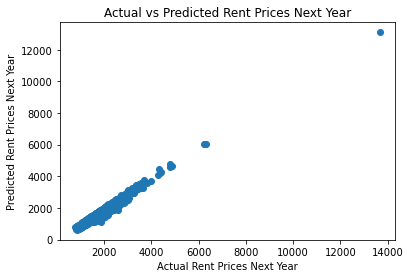

<Figure size 1600x2400 with 0 Axes>

In [15]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next Year')
plt.xlabel('Actual Rent Prices Next Year')
plt.ylabel('Predicted Rent Prices Next Year')
plt.figure(figsize=(20, 30), dpi=80)

In [16]:
scaler = StandardScaler()
pca = PCA()
mlmodel = LinearRegression()

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mlmodel', mlmodel)])


param_grid = {
    'pca__n_components': range(1,zori_census_covid_biann_14_20.shape[1]-2,3)
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
search.best_params_

{'pca__n_components': 43}

In [17]:
pca = PCA(n_components = search.best_params_['pca__n_components'])
pca.fit(x_test)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [18]:
mlmodel = LinearRegression()

mlmodel.fit(x_train, y_train)

LinearRegression()

In [19]:
print(mlmodel.score(x_train, y_train))
print(f'Train Score (Adj R Sq): {1 - (1-mlmodel.score(x_train, y_train))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')
print(mlmodel.score(x_test, y_test))
print(f'Test Score (Adj R Sq): {1 - (1-mlmodel.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)}')

0.9983539807448508
Train Score (Adj R Sq): 0.9983122479453393
0.9975690593430632
Test Score (Adj R Sq): 0.9975074258240488


<Figure size 1600x2400 with 0 Axes>

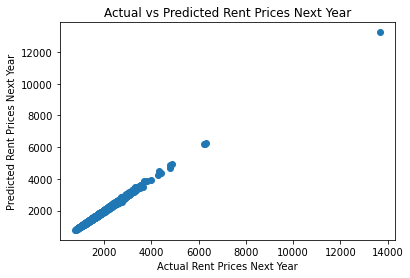

<Figure size 1600x2400 with 0 Axes>

In [20]:
y_predicted = mlmodel.predict(x_test)
y_predicted
plt.scatter(y_test, y_predicted)
plt.title('Actual vs Predicted Rent Prices Next Year')
plt.xlabel('Actual Rent Prices Next Year')
plt.ylabel('Predicted Rent Prices Next Year')
plt.figure(figsize=(20, 30), dpi=80)